# 1. 나라장터 데이터

https://www.g2b.go.kr:8101/ep/tbid/tbidList.do?searchType=1&bidSearchType=1&taskClCds=5&bidNm=%B5%F0%C1%F6%C5%D0&searchDtType=1&fromBidDt=2020%2F04%2F20&toBidDt=2020%2F10%2F19&fromOpenBidDt=&toOpenBidDt=&radOrgan=2&instNm=%B1%B3%C0%B0&instSearchRangeType=&refNo=&area=&areaNm=&strArea=&orgArea=&industry=&industryCd=&upBudget=&downBudget=&budgetCompare=&detailPrdnmNo=&detailPrdnm=&procmntReqNo=&intbidYn=&regYn=Y&recordCountPerPage=100

Google Spreadsheet으로 크롤링 후 csv 파일로 저장

In [2]:
import pandas as pd

df = pd.read_csv("crawled_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   공고번호-차수        376 non-null    object
 1   공고명            376 non-null    object
 2   수요기관           376 non-null    object
 3   입력일시
(입찰마감일시)  376 non-null    object
dtypes: object(4)
memory usage: 11.9+ KB


In [4]:
import re

df

,공고번호-차수,공고명,수요기관,입력일시\n(입찰마감일시)
0,20240432327-00,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024/04/19 14:55\n(2024/04/29 10:00)
1,20240421364-02,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024/04/17 17:44\n(-)
2,20240427845-00,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024/04/17 15:44\n(2024/04/29 15:00)
3,20240427288-00,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024/04/17 14:31\n(2024/05/28 10:00)
4,20240427759-00,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024/04/17 14:30\n(2024/05/28 10:00)
...,...,...,...,...
371,20200534133-00,중학교 사회·과학 디지털교과서 연계 교과융합형·심화형 실감형콘텐츠 개발,한국교육학술정보원,2020/06/01 16:01\n(2020/06/16 10:00)
372,20200533118-00,2020년 교육부 디지털 정책홍보 활성화 사업 계약,교육부,2020/05/26 17:56\n(2020/05/27 14:00)
373,20200526444-00,"군자디지털과학고 교사동(1,3,4동) 내진성능평가 용역",경기도교육청 경기도시흥교육지원청,2020/05/21 14:27\n(2020/05/29 10:00)
374,20200519514-00,2020년 방송중·고 디지털 학습 콘텐츠 개발 및 유지관리 사업,한국교육개발원,2020/05/18 17:10\n(2020/06/09 14:00)


## 1. 공고번호, 차수 나누어 정제하고 공고번호 인덱스로 만들기

In [5]:
df['공고번호-차수'] = df['공고번호-차수'].apply(lambda x: re.findall(r'[0-9]+', x))

In [6]:
df['공고번호-차수'].apply(lambda x: len(x) == 2).value_counts()

공고번호-차수
True     375
False      1
Name: count, dtype: int64

In [7]:
df['공고번호'] = df['공고번호-차수'].apply(lambda x: x[0])

In [8]:
df['차수'] = df['공고번호-차수'].apply(lambda x: x[1])

In [9]:
len(df['공고번호'].unique()) == len(df['공고번호'])

# 공고번호 유니크 확인

True

In [10]:
# 기존 '공고번호-차수' 컬럼 삭제, 공고번호 인덱스 만들기
df.drop('공고번호-차수', inplace = True, axis = 1)
df.set_index('공고번호', inplace = True)

df

,공고명,수요기관,입력일시\n(입찰마감일시),차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024/04/19 14:55\n(2024/04/29 10:00),00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024/04/17 17:44\n(-),02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024/04/17 15:44\n(2024/04/29 15:00),00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024/04/17 14:31\n(2024/05/28 10:00),00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024/04/17 14:30\n(2024/05/28 10:00),00
...,...,...,...,...
20200534133,중학교 사회·과학 디지털교과서 연계 교과융합형·심화형 실감형콘텐츠 개발,한국교육학술정보원,2020/06/01 16:01\n(2020/06/16 10:00),00
20200533118,2020년 교육부 디지털 정책홍보 활성화 사업 계약,교육부,2020/05/26 17:56\n(2020/05/27 14:00),00
20200526444,"군자디지털과학고 교사동(1,3,4동) 내진성능평가 용역",경기도교육청 경기도시흥교육지원청,2020/05/21 14:27\n(2020/05/29 10:00),00


## 2. 입력일시 컬럼명 깔끔하게 만들고 속성 데이트타임으로 변경하기

In [11]:
df['입력일시\n(입찰마감일시)'] = df['입력일시\n(입찰마감일시)'].apply(lambda x: re.findall(r'^.*?(?=\n)', x)[0])

In [12]:
df.head()

,공고명,수요기관,입력일시\n(입찰마감일시),차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024/04/19 14:55,00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024/04/17 17:44,02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024/04/17 15:44,00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024/04/17 14:31,00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024/04/17 14:30,00


In [13]:
df['입력일시\n(입찰마감일시)'] = pd.to_datetime(df['입력일시\n(입찰마감일시)'])

In [14]:
df.head()

,공고명,수요기관,입력일시\n(입찰마감일시),차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00


In [15]:
df.rename(columns = {'입력일시\n(입찰마감일시)' : '일시'}, inplace = True)

df.head()

,공고명,수요기관,일시,차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00


## 3. 키워드 컬럼 만들기

### (1) keyword 1. 교과서 (코스웨어)

In [16]:
keyword = '교과서'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    320
True      56
Name: count, dtype: int64

In [17]:
df['교과서 키워드'] = df['공고명'].str.contains(keyword)

df.head()

,공고명,수요기관,일시,차수,교과서 키워드
공고번호,,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00,True
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02,False
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00,False
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00,False
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00,False


### (2) keyword 2. 콘텐츠

In [18]:
keyword = '콘텐츠'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    330
True      46
Name: count, dtype: int64

In [19]:
df['콘텐츠 키워드'] = df['공고명'].str.contains(keyword)

df.head()

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드
공고번호,,,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00,True,False
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02,False,False
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00,False,False
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00,False,True
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00,False,True


### (3) keyword 3. 플랫폼

In [20]:
keyword = '플랫폼'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    349
True      27
Name: count, dtype: int64

In [21]:
df['플랫폼 키워드'] = df['공고명'].str.contains(keyword)

df.iloc[160:165]

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드,플랫폼 키워드
공고번호,,,,,,,
20230614440,2023년 디지털튜터 지원 사업,서울특별시교육청,2023-06-12 17:39:00,00,False,False,False
20230609880,(긴급)2023년 디지털 러닝 페스티벌 행사 용역,서울특별시교육청,2023-06-08 16:45:00,00,False,False,False
20230607689,"2023년 초,중학생 디지털 리터러시 수행형 평가도구 개선 및 수준 측정 연구",한국교육학술정보원,2023-06-07 15:02:00,00,False,False,False
20230607839,교원 전용 디지털콘텐츠 플랫폼 잇다 교원 성장 프로젝트 연수 개발 및 운영,한국교육학술정보원,2023-06-07 15:00:00,00,False,True,True
20230607578,2023년 초중등학교 디지털 전환 지표 개발 및 실태조사,한국교육학술정보원,2023-06-07 14:31:00,00,False,False,False


### (4) keyword 4. 이러닝

In [22]:
keyword = '이러닝'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    366
True      10
Name: count, dtype: int64

In [23]:
df['이러닝 키워드'] = df['공고명'].str.contains(keyword)

df.tail()

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드,플랫폼 키워드,이러닝 키워드
공고번호,,,,,,,,
20200534133,중학교 사회·과학 디지털교과서 연계 교과융합형·심화형 실감형콘텐츠 개발,한국교육학술정보원,2020-06-01 16:01:00,00,True,True,False,False
20200533118,2020년 교육부 디지털 정책홍보 활성화 사업 계약,교육부,2020-05-26 17:56:00,00,False,False,False,False
20200526444,"군자디지털과학고 교사동(1,3,4동) 내진성능평가 용역",경기도교육청 경기도시흥교육지원청,2020-05-21 14:27:00,00,False,False,False,False
20200519514,2020년 방송중·고 디지털 학습 콘텐츠 개발 및 유지관리 사업,한국교육개발원,2020-05-18 17:10:00,00,False,True,False,False
20200516075,2020년 중요기록물 디지털화 사업 용역,인천광역시교육청,2020-05-14 17:01:00,00,False,False,False,False


### (5) keyword 4. AI

In [24]:
keyword = 'AI'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    340
True      36
Name: count, dtype: int64

In [25]:
df['AI 키워드'] = df['공고명'].str.contains(keyword)

df.head()

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드,플랫폼 키워드,이러닝 키워드,AI 키워드
공고번호,,,,,,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00,True,False,False,False,True
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02,False,False,False,False,False
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00,False,False,False,False,False
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00,False,True,False,True,False
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00,False,True,False,True,False


### 키워드 5개 한 눈에 보기

In [26]:
df[['교과서 키워드', '콘텐츠 키워드', '플랫폼 키워드', '이러닝 키워드', 'AI 키워드']].head(10)

,교과서 키워드,콘텐츠 키워드,플랫폼 키워드,이러닝 키워드,AI 키워드
공고번호,,,,,
20240432327,True,False,False,False,True
20240421364,False,False,False,False,False
20240427845,False,False,False,False,False
20240427288,False,True,False,True,False
20240427759,False,True,False,True,False
20240425906,False,False,False,False,False
20240425533,True,False,False,False,True
20240414333,True,False,False,False,True
20240418097,False,False,False,False,False


### df 테이블 저장

## 4. 키워드 시각화

In [27]:
df.to_csv("preprocessed.csv")

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [44]:
plt.style.use( 'fivethirtyeight')

In [32]:
df[['교과서 키워드', '콘텐츠 키워드', '플랫폼 키워드', '이러닝 키워드', 'AI 키워드']].sum()

교과서 키워드    56
콘텐츠 키워드    46
플랫폼 키워드    27
이러닝 키워드    10
AI 키워드     36
dtype: int64

In [33]:
keywords_df = df[['교과서 키워드', '콘텐츠 키워드', '플랫폼 키워드', '이러닝 키워드', 'AI 키워드']].sum().sort_values(ascending = False)

In [34]:
keywords_df

교과서 키워드    56
콘텐츠 키워드    46
AI 키워드     36
플랫폼 키워드    27
이러닝 키워드    10
dtype: int64

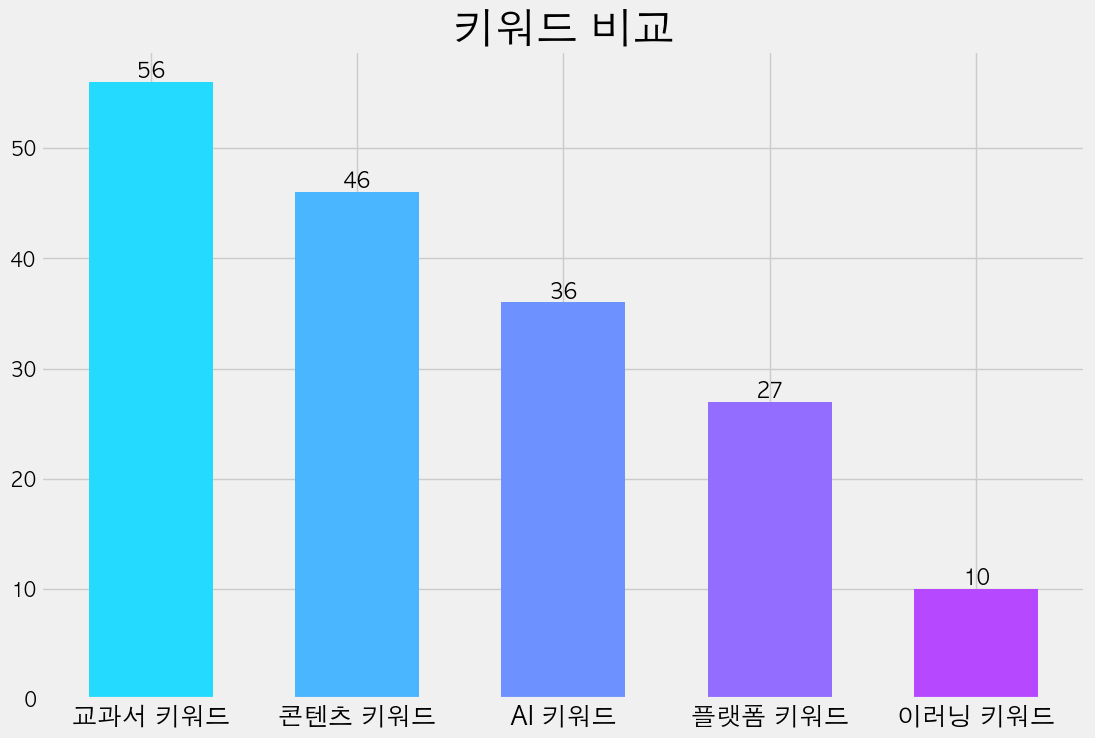

In [62]:
plt.figure(figsize = (12, 8))

colors = sns.color_palette('cool')
bars = plt.bar(keywords_df.index , keywords_df, color = colors, width = 0.6)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize = 15)

plt.title("키워드 비교", fontsize = 30)
plt.xticks(fontsize=18)
plt.savefig("keywords_edit.png", format="png")
plt.show()

# 2. 코스웨어 서비스 50개 데이터 정제 (2023.06)

In [59]:
import pandas as pd

data = pd.read_csv("courseware_data.csv")

In [60]:
data.head(3)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소3.1,가격
0,1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 예체능","초등학교, 중학교, 고등학교",x,o,x,x,"200,000/1인당"
1,2,(주)미네르바 에듀,교육용SW (꾸럼e),"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 비교과(상담/ 진로/체험 등)","초등학교, 중학교, 고등학교, 대학교",x,x,x,o,"프리미엄기준, 1년 100명 이용시 1인당 월 2,000원"
2,3,(주)코더블,코짐 (CoGym),정보/기술/실과,"초등학교, 중학교, 고등학교, 대학교",o,o,o,o,"베이직(6,600(월,\n 인당)),\n 프로(11,000(월,\n 인당))"


In [61]:
data.rename(columns = {"핵심요소3.1" : "핵심요소4"}, inplace = True)

data.head(3)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격
0,1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 예체능","초등학교, 중학교, 고등학교",x,o,x,x,"200,000/1인당"
1,2,(주)미네르바 에듀,교육용SW (꾸럼e),"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 비교과(상담/ 진로/체험 등)","초등학교, 중학교, 고등학교, 대학교",x,x,x,o,"프리미엄기준, 1년 100명 이용시 1인당 월 2,000원"
2,3,(주)코더블,코짐 (CoGym),정보/기술/실과,"초등학교, 중학교, 고등학교, 대학교",o,o,o,o,"베이직(6,600(월,\n 인당)),\n 프로(11,000(월,\n 인당))"


In [62]:
# 필요 없는 컬럼 드랍
data.drop(data.columns[[3, 4, 9]], axis = 1, inplace = True)

In [63]:
data.rename(columns = {'연 번' : '연번'}, inplace = True)
data.set_index('연번', inplace = True)

data.head()

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,x,o,x,x
2,(주)미네르바 에듀,교육용SW (꾸럼e),x,x,x,o
3,(주)코더블,코짐 (CoGym),o,o,o,o
4,(주)쿨스쿨,AI메이저봇,o,o,o,x
5,(주)쿨스쿨,쿨체커,o,x,x,o


In [65]:
# 핵심요소 컬럼 o -> True, x -> False 변환

columns_to_replace = ['핵심요소1', '핵심요소2', '핵심요소3', '핵심요소4']
replacement_values = ['o', 'x']

data[columns_to_replace] = data[columns_to_replace].replace(replacement_values, [True, False])

data.head()

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,False,True,False,False
2,(주)미네르바 에듀,교육용SW (꾸럼e),False,False,False,True
3,(주)코더블,코짐 (CoGym),True,True,True,True
4,(주)쿨스쿨,AI메이저봇,True,True,True,False
5,(주)쿨스쿨,쿨체커,True,False,False,True


# 3. 코스웨어 서비스 2024 144개 데이터 정제 (2024.04)

In [7]:
import pandas as pd

dff = pd.read_csv("courseware_data_2024.csv")
dff.head(2)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격,담당자 성명,담당자 이메일,홈페이지
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,(주)레드브릭,레드브릭 메이커스,정보/기술/실 과,"초등학교, 중학교, 고등학교, 대학교, 직업·평생교육",o,o,o,o,선도학교 별도 문의,이광용,k@redbrick.space,https://redbrickmakers.com


In [8]:
dff = dff.drop(0, axis = 0)
dff.head(2)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격,담당자 성명,담당자 이메일,홈페이지
1,1.0,(주)레드브릭,레드브릭 메이커스,정보/기술/실 과,"초등학교, 중학교, 고등학교, 대학교, 직업·평생교육",o,o,o,o,선도학교 별도 문의,이광용,k@redbrick.space,https://redbrickmakers.com
2,2.0,(주)NE능률,NE TIMES,영어,"초등학교, 중학교, 고등학교, 직업·평생교육",x,x,x,o,"198,000 / 1년 (1인당)",서준필,jp@neungyule.com,www.netimes.c om


In [9]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 1 to 136
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연 번      136 non-null    float64
 1   기업명      136 non-null    object 
 2   서비스명     136 non-null    object 
 3   과목       136 non-null    object 
 4   적용학교급    136 non-null    object 
 5   핵심요소1    136 non-null    object 
 6   핵심요소2    136 non-null    object 
 7   핵심요소3    136 non-null    object 
 8   핵심요소4    136 non-null    object 
 9   가격       136 non-null    object 
 10  담당자 성명   136 non-null    object 
 11  담당자 이메일  136 non-null    object 
 12  홈페이지     136 non-null    object 
dtypes: float64(1), object(12)
memory usage: 13.9+ KB


In [16]:
# 연번 정수타입으로 바꾸고 인덱스로 만들어주기
dff['연 번'] = dff['연 번'].astype(int)

In [20]:
dff.rename(columns = {'연 번' : '연번'}, inplace = True)

In [22]:
dff.set_index('연번', inplace = True)

dff.head(3)

,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격,담당자 성명,담당자 이메일,홈페이지
연번,,,,,,,,,,,,
1,(주)레드브릭,레드브릭 메이커스,정보/기술/실 과,"초등학교, 중학교, 고등학교, 대학교, 직업·평생교육",o,o,o,o,선도학교 별도 문의,이광용,k@redbrick.space,https://redbrickmakers.com
2,(주)NE능률,NE TIMES,영어,"초등학교, 중학교, 고등학교, 직업·평생교육",x,x,x,o,"198,000 / 1년 (1인당)",서준필,jp@neungyule.com,www.netimes.c om
3,*신규 (주)더플랜지,오딩가잉글 리시,영어,"초등학교, 중학교",x,x,x,o,"학생 1인당 6천원-8천원/월 , 인원, 기간에 따라 상이함. 학교별 맞춤 견적 제공",정주영,lj@theplang.com,https://odinga.t heplang.com/


In [34]:
# 필요 없는 컬럼 드랍
dff.drop(dff.columns[[2, 3, 8, 9, 10, 11]], axis = 1, inplace = True)

dff.head(3)

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
1,(주)레드브릭,레드브릭 메이커스,o,o,o,o
2,(주)NE능률,NE TIMES,x,x,x,o
3,*신규 (주)더플랜지,오딩가잉글 리시,x,x,x,o


In [38]:
# 중복을 제외한 기업의 갯수 카운트

num_of_companies_2024 = len(dff['기업명'].unique())
num_of_companies_2024

100

In [39]:
# 핵심요소 컬럼 o -> True, x -> False 변환

columns_to_replace = ['핵심요소1', '핵심요소2', '핵심요소3', '핵심요소4']
replacement_values = ['o', 'x']

dff[columns_to_replace] = dff[columns_to_replace].replace(replacement_values, [True, False])

dff.head()

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
1,(주)레드브릭,레드브릭 메이커스,True,True,True,True
2,(주)NE능률,NE TIMES,False,False,False,True
3,*신규 (주)더플랜지,오딩가잉글 리시,False,False,False,True
4,(주)매쓰마스터,일프로연산,True,False,True,True
5,(주)매쓰홀릭,매쓰홀릭T,True,True,True,True


# 4. 코스웨어 2023, 2024 데이터 분석

In [212]:
# 2023 
data.head(3)

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,False,True,False,False
2,(주)미네르바 에듀,교육용SW (꾸럼e),False,False,False,True
3,(주)코더블,코짐 (CoGym),True,True,True,True


In [213]:
data.tail(3)

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
48,팀플백,자작자작,True,True,True,True
49,피씨엔씨,"AI기반의 재미있는 독서서비스, 토핑(TOAP ING)",True,False,True,True
50,해피에듀테크,매쓰튜터,True,True,True,True


In [211]:
# 2024
dff.head(3)

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
1,(주)레드브릭,레드브릭 메이커스,True,True,True,True
2,(주)NE능률,NE TIMES,False,False,False,True
3,*신규 (주)더플랜지,오딩가잉글 리시,False,False,False,True


In [210]:
dff.tail(3)

,기업명,서비스명,핵심요소1,핵심요소2,핵심요소3,핵심요소4
연번,,,,,,
134,팀모노리스,코들,True,True,True,True
135,팀플백,자작자작,True,True,True,True
136,피씨엔씨,"AI기반의 재미있는 독서서비스, 토핑(TOAP ING)",True,False,True,True


In [86]:
table = []

for df in [data, dff]:
    companies = len(df['기업명'].unique())
    f_1 = df['핵심요소1'].value_counts()[True]
    f_2 = df['핵심요소2'].value_counts()[True]
    f_3 = df['핵심요소3'].value_counts()[True]
    f_4 = df['핵심요소4'].value_counts()[True]
    table.append([companies, f_1, f_2, f_3, f_4])

In [88]:
table

[[44, 44, 37, 37, 39], [100, 104, 78, 110, 113]]

In [94]:
table = pd.DataFrame(table, columns = ['기업수', '데이터분석기능', 'AI튜터기능', '학생용대시보드', '교사용대시보드'], index = [2023, 2024])

table

,기업수,데이터분석기능,AI튜터기능,학생용대시보드,교사용대시보드
2023,44,44,37,37,39
2024,100,104,78,110,113


In [96]:
import matplotlib.pyplot as plt

In [113]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [114]:
plt.style.use('fivethirtyeight')

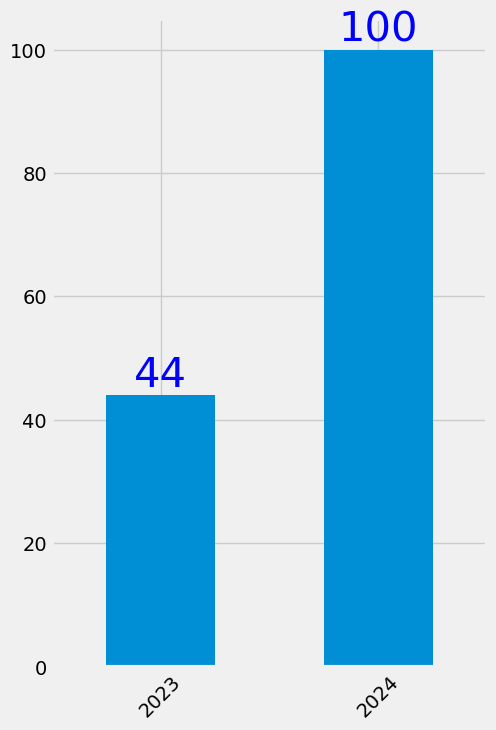

In [116]:
# -*- coding: utf-8 -*-
plt.figure(figsize = (5, 8))
table['기업수'].plot(kind='bar')
plt.xticks(rotation = 45)


for index, value in enumerate(table['기업수']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=30, color='blue')


plt.show()

In [119]:
table.columns[1:]

Index(['데이터분석기능', 'AI튜터기능', '학생용대시보드', '교사용대시보드'], dtype='object')

In [148]:
table_features = table[table.columns[1:]]
table_features

,데이터분석기능,AI튜터기능,학생용대시보드,교사용대시보드
2023,44,37,37,39
2024,104,78,110,113


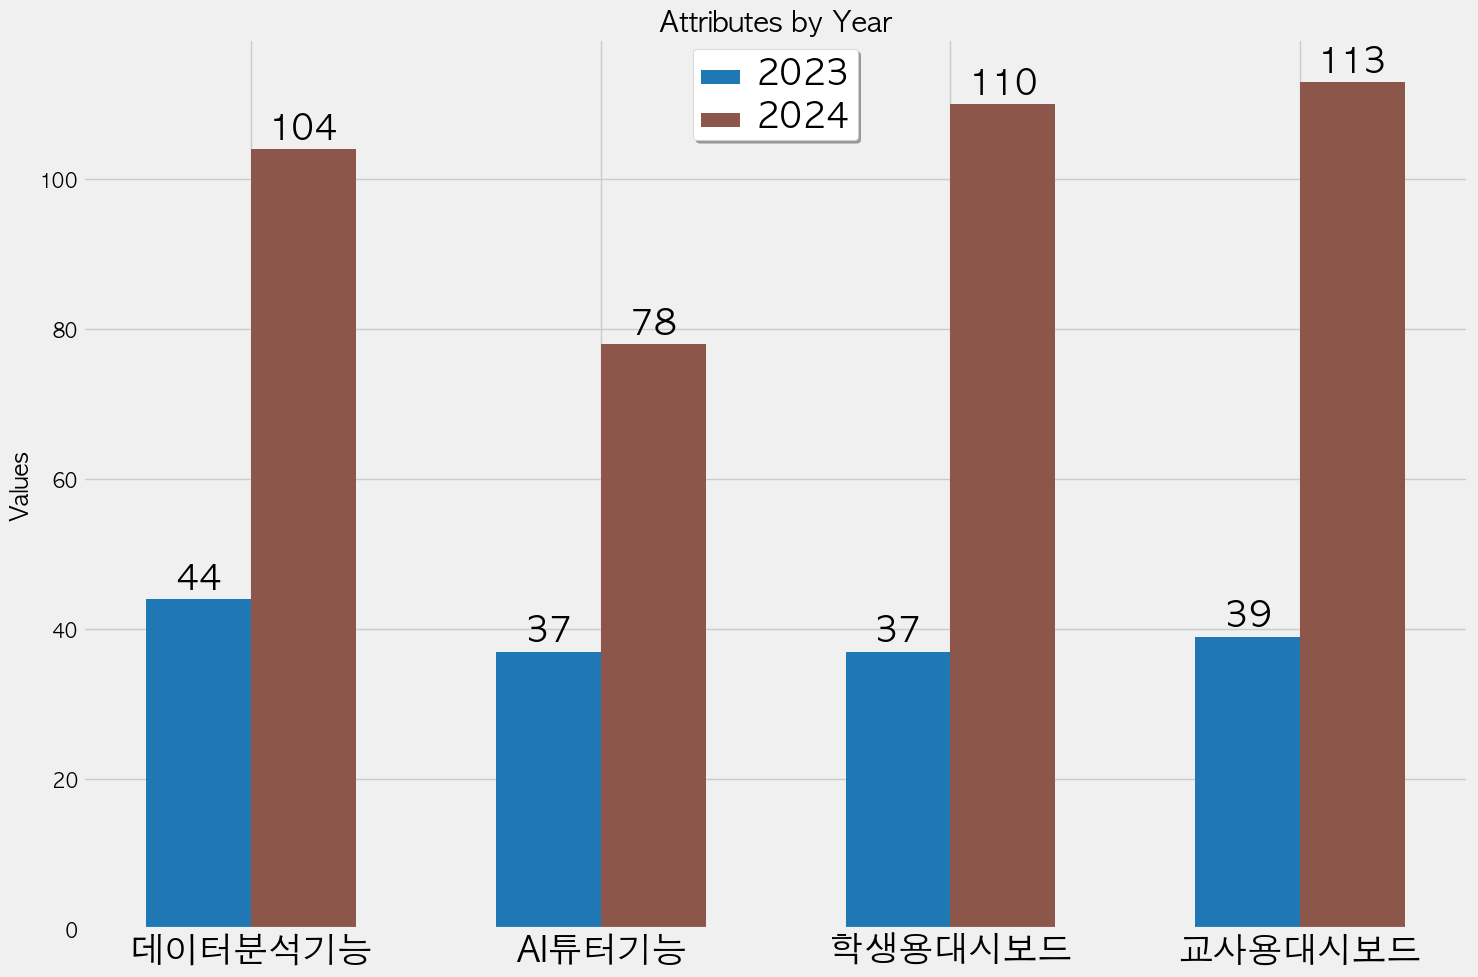

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming table_features is your DataFrame with 2 rows, 4 columns, and an index
attributes = table_features.columns.tolist()
years = table_features.index.tolist()

x = np.arange(len(attributes))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))

for idx, year in enumerate(years):
    values = table_features.loc[year].tolist()
    rects = ax.bar(x + width * idx, values, width, label=str(year),
                   color=plt.cm.tab10(idx / len(years)))

    # Display the value of each bar on top of them
    ax.bar_label(rects, padding=3, size = 25)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Attributes by Year')
ax.set_xticks(x + 0.15)
ax.set_xticklabels(attributes, fontweight='bold', fontsize=25)  # Set font weight and size for x-labels

# Place the legend upper center with shadow and white face
legend = ax.legend(loc='upper center', shadow=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontsize(25)  # Set legend font size
    text.set_fontweight('bold')  # Set legend font weight

plt.tight_layout()
plt.savefig("Attributes_by_year.png")
plt.show()
